# Cellular Automata Simulation

Using various update rules, complicated phenomena emerges from iterations.

## Exercise 1, 1D automata and traffic simulation

rule184 has the binary code: ```10111000```

In [45]:
rule = bitstring(UInt8(184))
# parse(Int,rule,base = 2)

"10111000"

In [99]:
# v= [1,0,1,1,1,0,0,0]
# @time reduce((x,y)->x<<1+y, v; init=0)

# neighbourhood = [0,1,0]
# neighbourhood = reduce((x,y)->x<<1+y, neighbourhood; init=0)
# rule_neigh = parse(Int,rule[neighbourhood+1])
using Plots

function getRule(ruleNum::Int)
    return bitstring(UInt8(ruleNum))
end

function queryRule(rule, neighbourhood)
    neighbourhood = reduce((x,y)->x<<1+y, neighbourhood; init=0)
    return parse(Int,rule[8-neighbourhood])
end

function evolveDirichlet(rule, state)
    new_state = copy(state)
    for i in 2:length(state)-1
        new_state[i] = queryRule(rule, state[i-1:i+1])
    end
    return new_state
end

function evolvePeriodic(rule, state)
    new_state = copy(state)
    for i in 1:length(state)
        neighbourState = [state[mod1(i-1,length(state))], state[i], state[mod1(i+1,length(state))]]
        new_state[i] = queryRule(rule, neighbourState)
    end
    return new_state
end

# plot the state in color black and white squares

function plotState(state)
    n = length(state)
    plot(1:n, [state zeros(Int, n)], seriestype = :bar, color = [:black :white], legend = false, grid = false, xticks = false, yticks = false,xaxis=false,yaxis=false,size=(500,50))
end

plotState (generic function with 1 method)

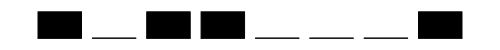

In [100]:
plotState([1,0,1,1,0,0,0,1])

## Rule 184
traffic simulation. the elements are traveling rightwards.

With the Dirichlet boundary, the boundary 0 is fixed to be an endpoint of car drain. the boundary of 1 is fixed to be a start point of car influx.

The ```1010...``` pattern is the most stable propagating pattern and will eventually happen i Dirichlet if the end isn't clogged.

In Periodic, if the number of cars exceeds half of number of slots, the clog happens.

In [94]:
rule = getRule(184)
init = [1,0,0,0,0,0,0,1,1,1,0,0,0,1,0]
for _ in 1:10
    init = evolveDirichlet(rule, init)
    println(init)
end

[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]


In [70]:
rule = getRule(184)
init = [1,0,0,0,0,0,0,1,1,1,0,0,0,1,0]
for _ in 1:10
    init = evolvePeriodic(rule, init)
    println(init)
end

[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]


In [71]:
rule = getRule(184)
init = [1,0,1,0,1,1,0,1,1,1,0,1,0,1,0]
for _ in 1:10
    init = evolvePeriodic(rule, init)
    println(init)
end

[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
[0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]


In [ ]:
# Function to compute the next state of a 1D cellular automaton with Rule 184
# function rule184(state::Vector{Int}, steps::Int)
#     # Define the rule for each 3-bit neighborhood configuration
#     rule = Dict(
#         (1, 1, 1) => 1,
#         (1, 1, 0) => 0,
#         (1, 0, 1) => 1,
#         (1, 0, 0) => 1,
#         (0, 1, 1) => 1,
#         (0, 1, 0) => 1,
#         (0, 0, 1) => 0,
#         (0, 0, 0) => 0
#     )
    
#     # Run the automaton for the specified number of steps
#     for _ in 1:steps
#         # Create a new state to store the next generation
#         new_state = copy(state)
#         for i in 2:length(state)-1  # Avoid the boundaries for simplicity
#             neighborhood = (state[i-1], state[i], state[i+1])
#             new_state[i] = rule[neighborhood]
#         end
#         # Update state for the next iteration
#         state = copy(new_state)
#         write(stdout, join(state, " "), "\n")
#     end
# end


# initial_state = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
# steps = 10
# rule184(initial_state, steps)

0 1 0 1 1 1 0 1 0 0
0 1 1 1 1 0 1 1 1 0
0 1 1 1 0 1 1 1 0 0
0 1 1 0 1 1 1 0 1 0
0 1 0 1 1 1 0 1 1 0
0 1 1 1 1 0 1 1 0 0
0 1 1 1 0 1 1 0 1 0
0 1 1 0 1 1 0 1 1 0
0 1 0 1 1 0 1 1 0 0
0 1 1 1 0 1 1 0 1 0


┌ Info: Saved animation to /home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/rule184_2.gif
└ @ Plots /home/zgd/.julia/packages/Plots/kLeqV/src/animation.jl:156


Plots.AnimatedGif("/home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/rule184_2.gif")
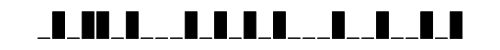

In [114]:

init = [1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1]

rule184_gif = @animate for i in 1:40
    global init
    init = evolvePeriodic(getRule(184), init)
    plotState(init)
end

gif(rule184_gif, "rule184_2.gif", fps = 8)

00011110


┌ Info: Saved animation to /home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/rule30.gif
└ @ Plots /home/zgd/.julia/packages/Plots/kLeqV/src/animation.jl:156


Plots.AnimatedGif("/home/zgd/projects/GithubRepos/myExploration/computationalPhysicsCourses/ex06/rule30.gif")
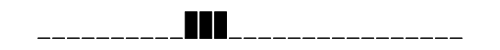

In [126]:
init = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


# change rule to 110
println(getRule(30))
rule_gif = @animate for i in 1:40
    global init
    init = evolvePeriodic(getRule(30), init)
    plotState(init)
end

# rule184_gif = @animate for i in 1:40
#     global init
#     init = evolvePeriodic(getRule(184), init)
#     plotState(init)
# end

gif(rule_gif, "rule30.gif", fps = 8)

## Game of Life